In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

In [2]:
# read .csv file
df = pd.read_csv("ads.csv")

In [3]:
# Data profiling and inspection
print(df.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [5]:
print(df.dtypes)

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object


In [6]:
# dropping and unnamed column as it is only used for indexing

df = df.drop(columns = ['Unnamed: 0'], axis = 1)
print(df.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [7]:
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


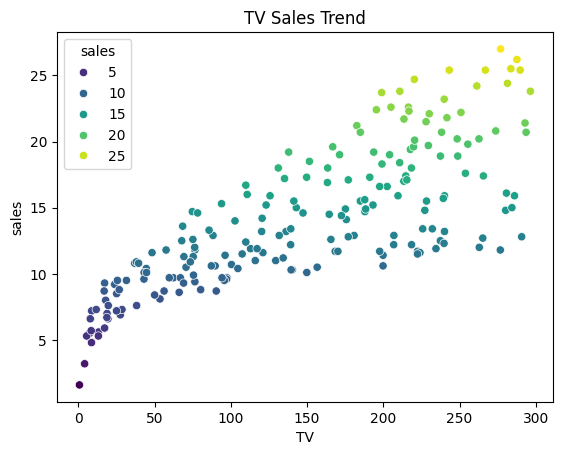

None


In [8]:
# TV advert Sales
sns.scatterplot(data = df, x = df['TV'], y = df['sales'], palette = 'viridis', hue = df['sales'])
plt.title('TV Sales Trend')
print(plt.show())

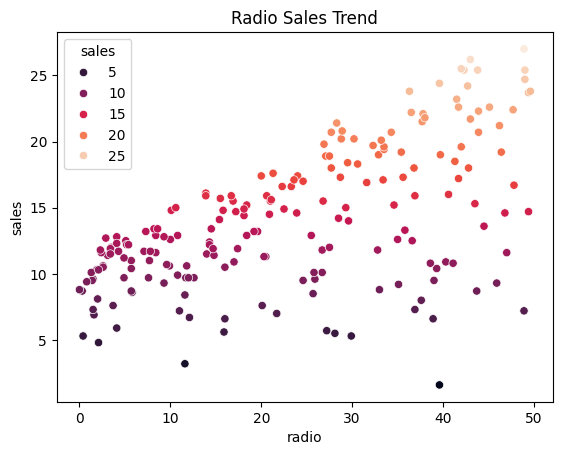

None


In [9]:
# Radio advert Sales
sns.scatterplot(data = df, x = df['radio'], y = df['sales'], palette = 'rocket', hue = df['sales'])
plt.title('Radio Sales Trend')
print(plt.show())

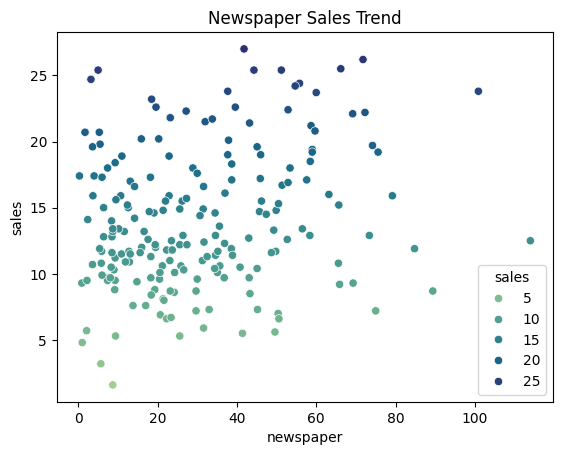

None


In [10]:
# Newspaper advert sales
sns.scatterplot(data = df, x = df['newspaper'], y = df['sales'], palette = 'crest', hue = df['sales'])
plt.title('Newspaper Sales Trend')
print(plt.show())

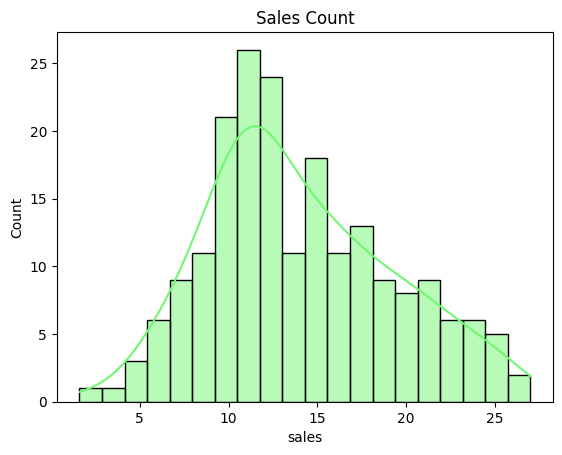

None


In [11]:
# Analyzing Dependent Variables (y)
sns.histplot(df['sales'], bins = 20, color = "#72f772", edgecolor = 'black', kde = True)
plt.title("Sales Count")
print(plt.show())

In [12]:
# Checking for missing values
print(df.isna().sum())  # There is no missing values.

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


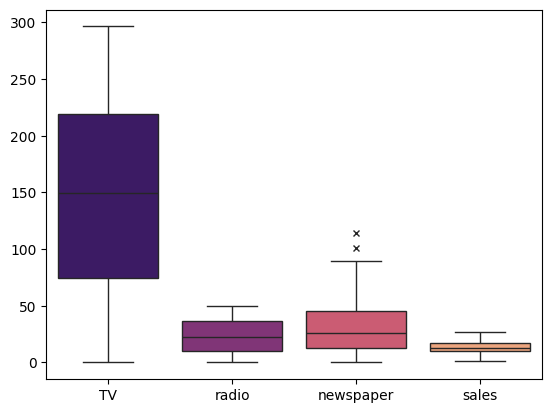

None


In [13]:
# boxplot for checking outliers
sns.boxplot(data = df, palette = 'magma', linewidth = 1, fliersize = 5, flierprops = {"marker": "x"})
print(plt.show())

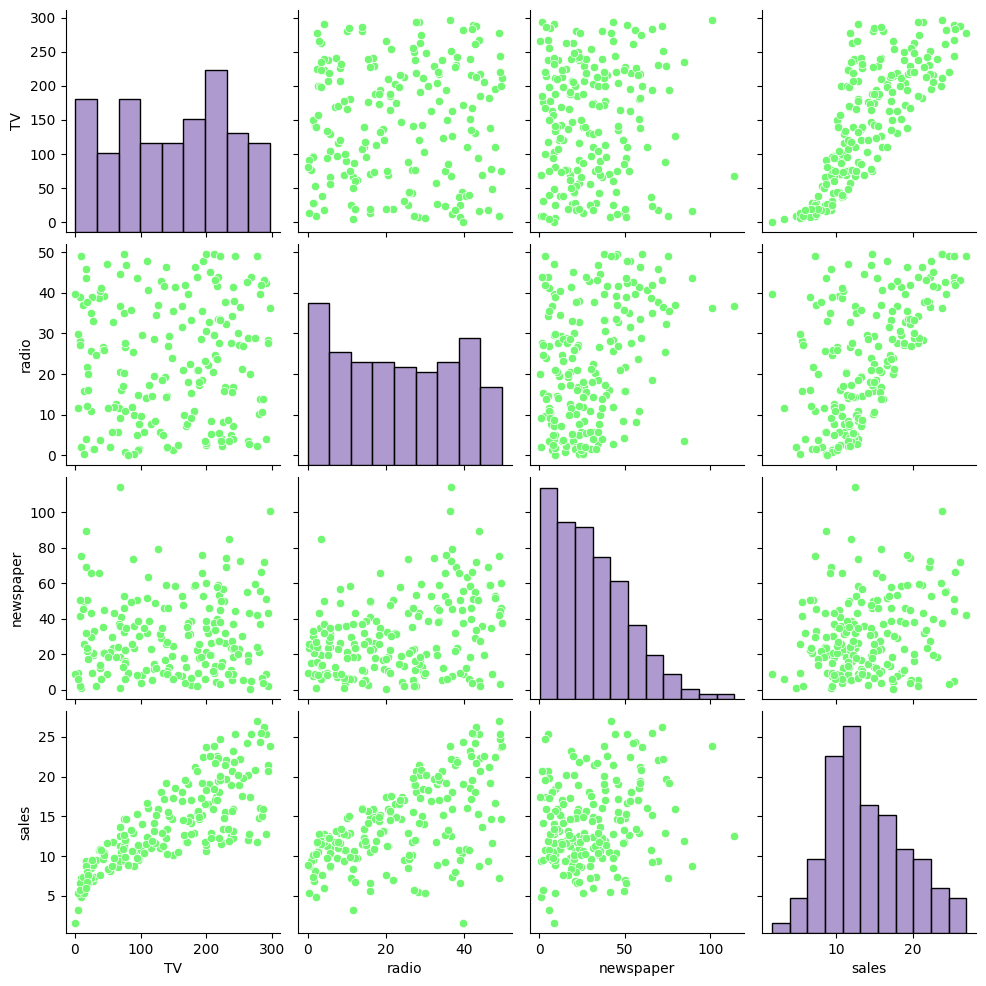

None


In [14]:
# pair-plot to find relation between all variables
sns.pairplot(data = df, plot_kws = {'color': "#72f772"}, diag_kws = {'color': "#9578bf"})
print(plt.show())

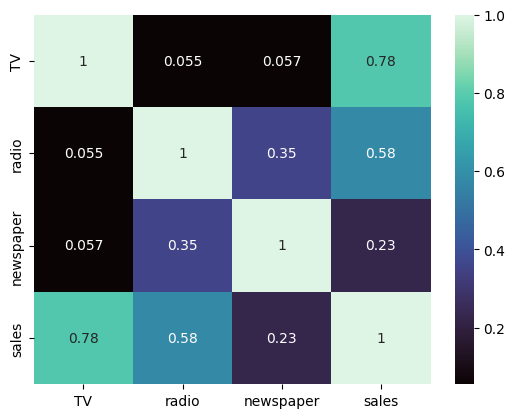

None


In [15]:
# heatmap to check correlation
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'mako')
print(plt.show())

In [16]:
# Handling outliers using z-score
z_score = np.abs(stats.zscore(df['newspaper']))
outlier = df[z_score > 3]
median_wout_outlier = df['newspaper'][z_score <= 3].median()
df.loc[z_score > 3, 'newspaper'] = median_wout_outlier

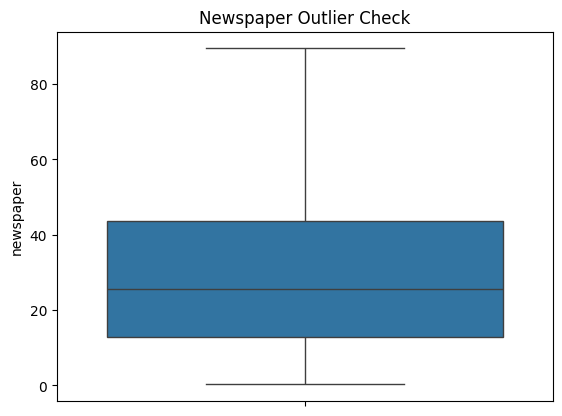

None


In [18]:
sns.boxplot(data = df['newspaper'], flierprops = {"marker": "x"})
plt.title('Newspaper Outlier Check')
print(plt.show())

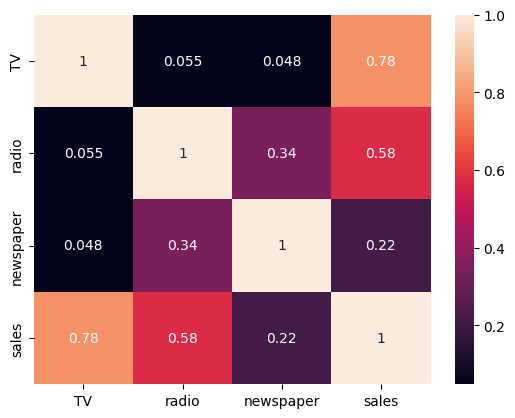

None


In [19]:
# heatmap after addressing outliers
sns.heatmap(df.corr(numeric_only = True), annot = True)
print(plt.show())

In [20]:
# Feature Engineering assuming TV/Radio interaction as impact on sales
# Creating Interaction feature
df['TV_radio_interaction'] = df['TV'] * df['radio']

In [21]:
# Selecting dependent and independent variables
X = df.loc[:, ["TV_radio_interaction", "TV", "radio"]]  # DataFrame 2-Dimension
y = df['sales']  # Series 1-Dimension

In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Machine Learning Model: Using Linear Regression
model = Pipeline([('scaler', StandardScaler()), ('linreg', LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [24]:
y_pred = model.predict(X_test)
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(compare)

     Actual  Predicted
95     16.9  16.410232
15     22.4  21.971324
30     21.4  22.121765
158     7.3   8.657175
128    24.7  24.053070
115    12.6  12.140878
69     22.3  22.464945
170     8.4   8.679765
174    11.5  11.958375
45     14.9  15.041808
66      9.5   8.975985
182     8.7   8.322468
165    11.9  12.238818
78      5.3   8.005219
186    10.3   9.801119
177    11.7  11.688756
56      5.5   8.025437
152    16.6  16.208585
82     11.3  10.476016
68     18.9  19.156705
124    19.7  20.098285
16     12.5  11.899259
148    10.9  10.446502
93     22.2  22.497221
65      9.3   9.036715
60      8.1   7.916193
84     21.7  22.014856
67     13.4  12.044078
125    10.6   9.887608
132     5.7   8.040078
9      10.6  11.238756
18     11.3  10.247895
55     23.7  22.629784
75      8.7   9.318939
150    16.1  16.771804
104    20.7  21.134178
135    11.6  11.658346
137    20.8  21.368115
164    11.9  11.305846
76      6.9   7.326288


In [25]:
# using MSE, MAE and r2 score to check accuracy
print("Using Linear Regression")
print(f'mean_squared_error = {mean_squared_error(y_true = y_test, y_pred = y_pred)}')
print(f'mean_absolute_error = {mean_absolute_error(y_true = y_test, y_pred = y_pred)}')
print(f'r2_score = {r2_score(y_true = y_test, y_pred = y_pred)}')

Using Linear Regression
mean_squared_error = 0.8127098150754473
mean_absolute_error = 0.6663640961219156
r2_score = 0.9742516704050708


In [26]:
# Model dumping
with open("modelLR.pickle", 'wb') as file:
    pickle.dump(model, file)